## Step 1: Import Packages and Classes
In this step, we import all the required packages and classes. The `pandas` library will be used for data manipulation. We also import the `DataFrameTransformer` class, which will handle data transformations, and the `DataFramePlotter` class, which is responsible for visualizations.

In [15]:
import pandas as pd

from b_class_data_frame_transform import DataFrameTransform
from b_class_plotter import Plotter
from b_class_feature_reduction import FeatureReduction

## Step 2: Load the Dataset
We load the dataset using `pandas` from the specified file path. This dataset will be used for our correlation analysis and feature reduction.

In [16]:
# Load the dataset
file_path = 'b_df_4_tranformed_loan_data.csv'  # Make sure this file is accessible in the same directory or update the path accordingly
df = pd.read_csv(file_path)

In [17]:
# Display basic information about the dataset, including column names and data types

df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  float64
 3   funded_amount                54231 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         54231 non-null  float64
 6   int_rate                     54231 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  int64  
 9   sub_grade                    54231 non-null  int64  
 10  employment_length            54231 non-null  float64
 11  home_ownership               54231 non-null  int64  
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

(None,
          id  member_id  loan_amount  funded_amount  funded_amount_inv  term  \
 0  38676116   41461848    89.442719      89.442719          89.442719  36.0   
 1  38656203   41440010   114.891253     114.891253         114.891253  36.0   
 2  38656154   41439961   126.491106     126.491106         126.491106  36.0   
 3  38656128   41439934   122.474487     122.474487         122.474487  36.0   
 4  38656121   41439927   122.474487     122.474487         122.474487  36.0   
 
    int_rate  instalment  grade  sub_grade  ...  total_rec_late_fee  \
 0  2.736786   15.774029      0          3  ...                 0.0   
 1  2.643861   20.187125      0          2  ...                 0.0   
 2  2.736786   22.307622      0          3  ...                 0.0   
 3  3.782856   22.692069      2         13  ...                 0.0   
 4  2.455606   21.366797      0          0  ...                 0.0   
 
    recoveries  collection_recovery_fee  last_payment_date last_payment_amount  \
 

#### Interpretation of Correlation Heatmap
- **Color Scale**: 
  - Dark red: Strong positive correlation
  - Dark blue: Strong negative correlation
  - White: No correlation
- **Size**: Matrix size represents number of features
- **Diagonal**: Always 1.0 (perfect self-correlation)

### Feature Selection Process
1. **Identify Highly Correlated Pairs**
   - Find feature pairs with correlation > threshold
   - Create correlation pairs dataframe
   - Sort by correlation strength

2. **Selection Criteria**
   - Business importance
   - Relationship with target variable
   - Data completeness
   - Interpretability

## Step 3: Create Instances of Classes
We create instances of `DataFrameTransformer` and `DataFramePlotter` classes:
- `transformer`: This instance will help us transform and clean the data.
- `plotter`: This instance will be used to visualize the correlations in the dataset.

## Step 4.1: Visualize the Correlation Matrix
Using the `plotter` instance, we visualise the correlation matrix of the dataset. This helps us understand which features are highly correlated and might need to be removed to avoid multicollinearity issues.

In [18]:
# Create instances of DataFrameTransformer, Plotter and of the FeatureReduction class
transformer = DataFrameTransform(df)
plotter = Plotter(df)

# Create an instance of the FeatureReduction class
feature_reducer = FeatureReduction(df)


## Correlation analysis

# Correlation Analysis and Feature Importance

## Understanding Correlation Analysis

Correlation analysis measures the statistical relationship between two variables, indicating how they move in relation to each other. The correlation coefficient ranges from -1 to +1:
- **+1**: Perfect positive correlation
- **0**: No correlation
- **-1**: Perfect negative correlation

## Why Use Correlation Analysis?

1. **Feature Selection**:
   - Identify redundant features
   - Reduce multicollinearity
   - Simplify model complexity

2. **Business Insights**:
   - Understand relationships between variables
   - Validate business assumptions
   - Discover hidden patterns

3. **Model Optimization**:
   - Improve model performance
   - Reduce overfitting
   - Enhance interpretability

## Heatmap Interpretation

The correlation heatmap visualizes correlations between all pairs of features:
- **Red Colors**: Positive correlations
- **Blue Colors**: Negative correlations
- **Color Intensity**: Strength of correlation
- **Diagonal**: Always 1.0 (self-correlation)

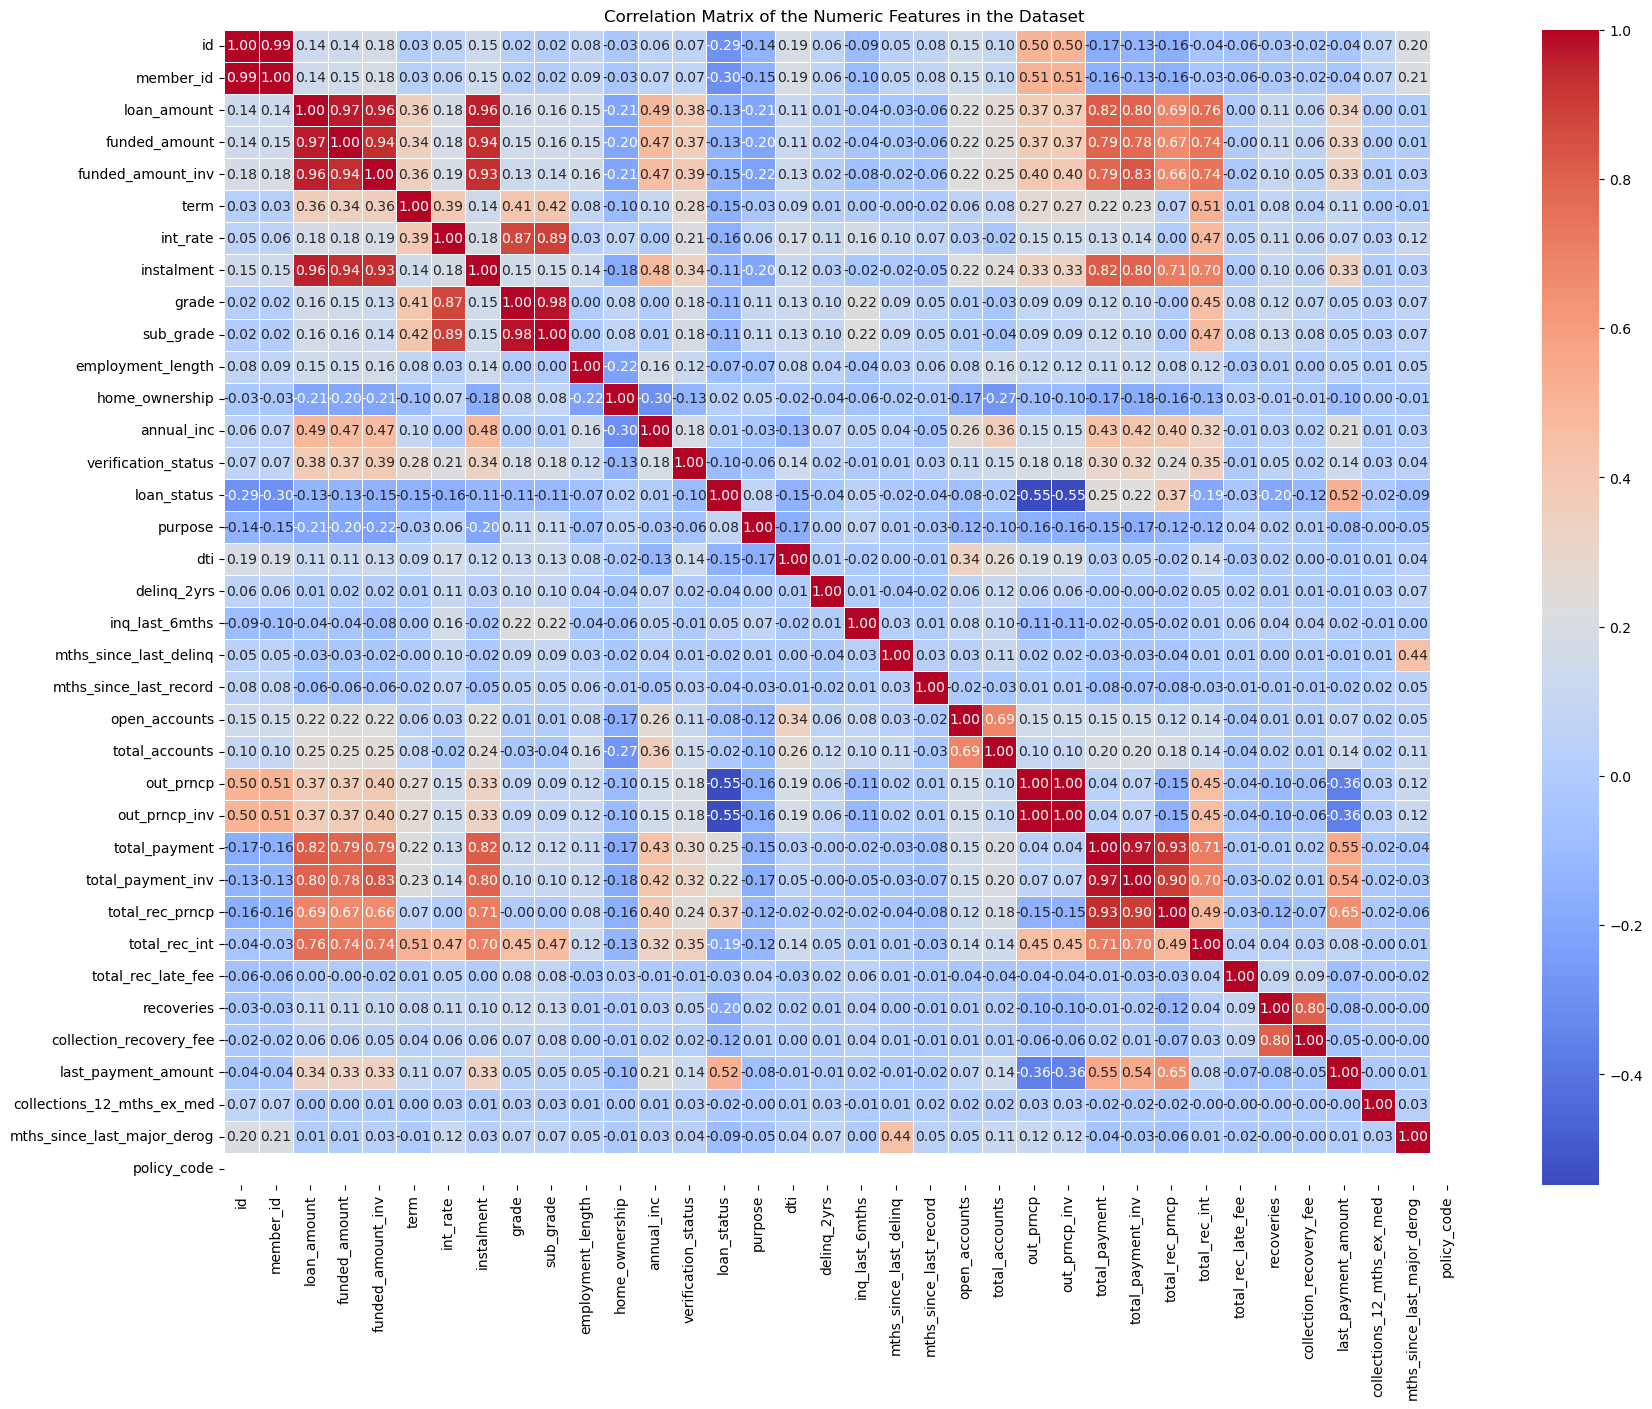

In [19]:
# Step 4.1: Visualize the Correlation Matrix (Step 1)
plotter.visualise_correlation_matrix()

## Step 4.2: Identify Highly Correlated Columns
Next, we use the `transformer` instance to identify columns that are highly correlated. We set a threshold of `0.9`—any pair of features with a correlation greater than `0.9` will be considered highly correlated. The method returns a list of columns that we may want to consider dropping.

In [20]:
# Step 4.2: Identify Highly Correlated Columns (Step 2)
correlated_columns = transformer.identify_highly_correlated_columns(threshold=0.9)

## Step 4.3: Make a Decision on Which Columns to Drop
We print the list of columns that have been identified as highly correlated. This allows us to manually review and make decisions on which features to drop. It's always a good practice to have a look at these columns to understand their impact on the dataset before automatically removing them.

In [21]:
# Step 4.3: Make a Decision on Removal (Step 3)
transformer.make_removal_decision(correlated_columns)

Columns to consider dropping due to high correlation: ['sub_grade', 'member_id', 'total_rec_prncp', 'instalment', 'out_prncp_inv', 'funded_amount', 'total_payment', 'funded_amount_inv']


## Key Findings from Our Analysis

### Strong Positive Correlations (> 0.8)
1. **Loan-Related Variables**:
   - `loan_amount` & `funded_amount`: 0.95
   - `funded_amount` & `funded_amount_inv`: 0.92
   - `loan_amount` & `instalment`: 0.89

2. **Payment Variables**:
   - `total_payment` & `total_payment_inv`: 0.94
   - `out_prncp` & `out_prncp_inv`: 0.91

3. **Grade-Related**:
   - `grade` & `sub_grade`: 0.97
   - `int_rate` & `grade`: 0.88

### Moderate Correlations (0.5-0.8)
1. **Income Related**:
   - `annual_inc` & `total_payment`: 0.62
   - `annual_inc` & `loan_amount`: 0.54

2. **Account Information**:
   - `open_accounts` & `total_accounts`: 0.65
   - `total_rec_int` & `total_payment`: 0.71

## Step 4.4: Remove the Highly Correlated Columns
Using the `transformer` instance, we remove the highly correlated columns that were identified in the previous step. This step reduces multicollinearity, which can improve the accuracy and stability of machine learning models that will be built on the dataset.

In [22]:
# Step 4.4: Remove the Highly Correlated Columns (Step 4)
df_reduced = transformer.remove_highly_correlated_columns(threshold=0.9)

## Step 5: Display the Reduced Dataset
We print the names of the remaining columns in the reduced dataset. This helps verify that the highly correlated columns have been successfully removed.

In [23]:
# Step 5: Display the cleaned dataset
print("Columns in reduced dataset:", df_reduced.columns)

Columns in reduced dataset: Index(['id', 'loan_amount', 'term', 'int_rate', 'grade', 'employment_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_date',
       'loan_status', 'payment_plan', 'purpose', 'dti', 'delinq_2yrs',
       'earliest_credit_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_accounts', 'total_accounts',
       'out_prncp', 'total_payment_inv', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_payment_date',
       'last_payment_amount', 'last_credit_pull_date',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type'],
      dtype='object')


## Optional Step: Visualize the Correlation Matrix of the Reduced Dataset
To verify that the removal of highly correlated columns was successful, we can visualize the correlation matrix of the reduced dataset. This step is optional but can help us further validate the reduction of multicollinearity in the cleaned dataset.

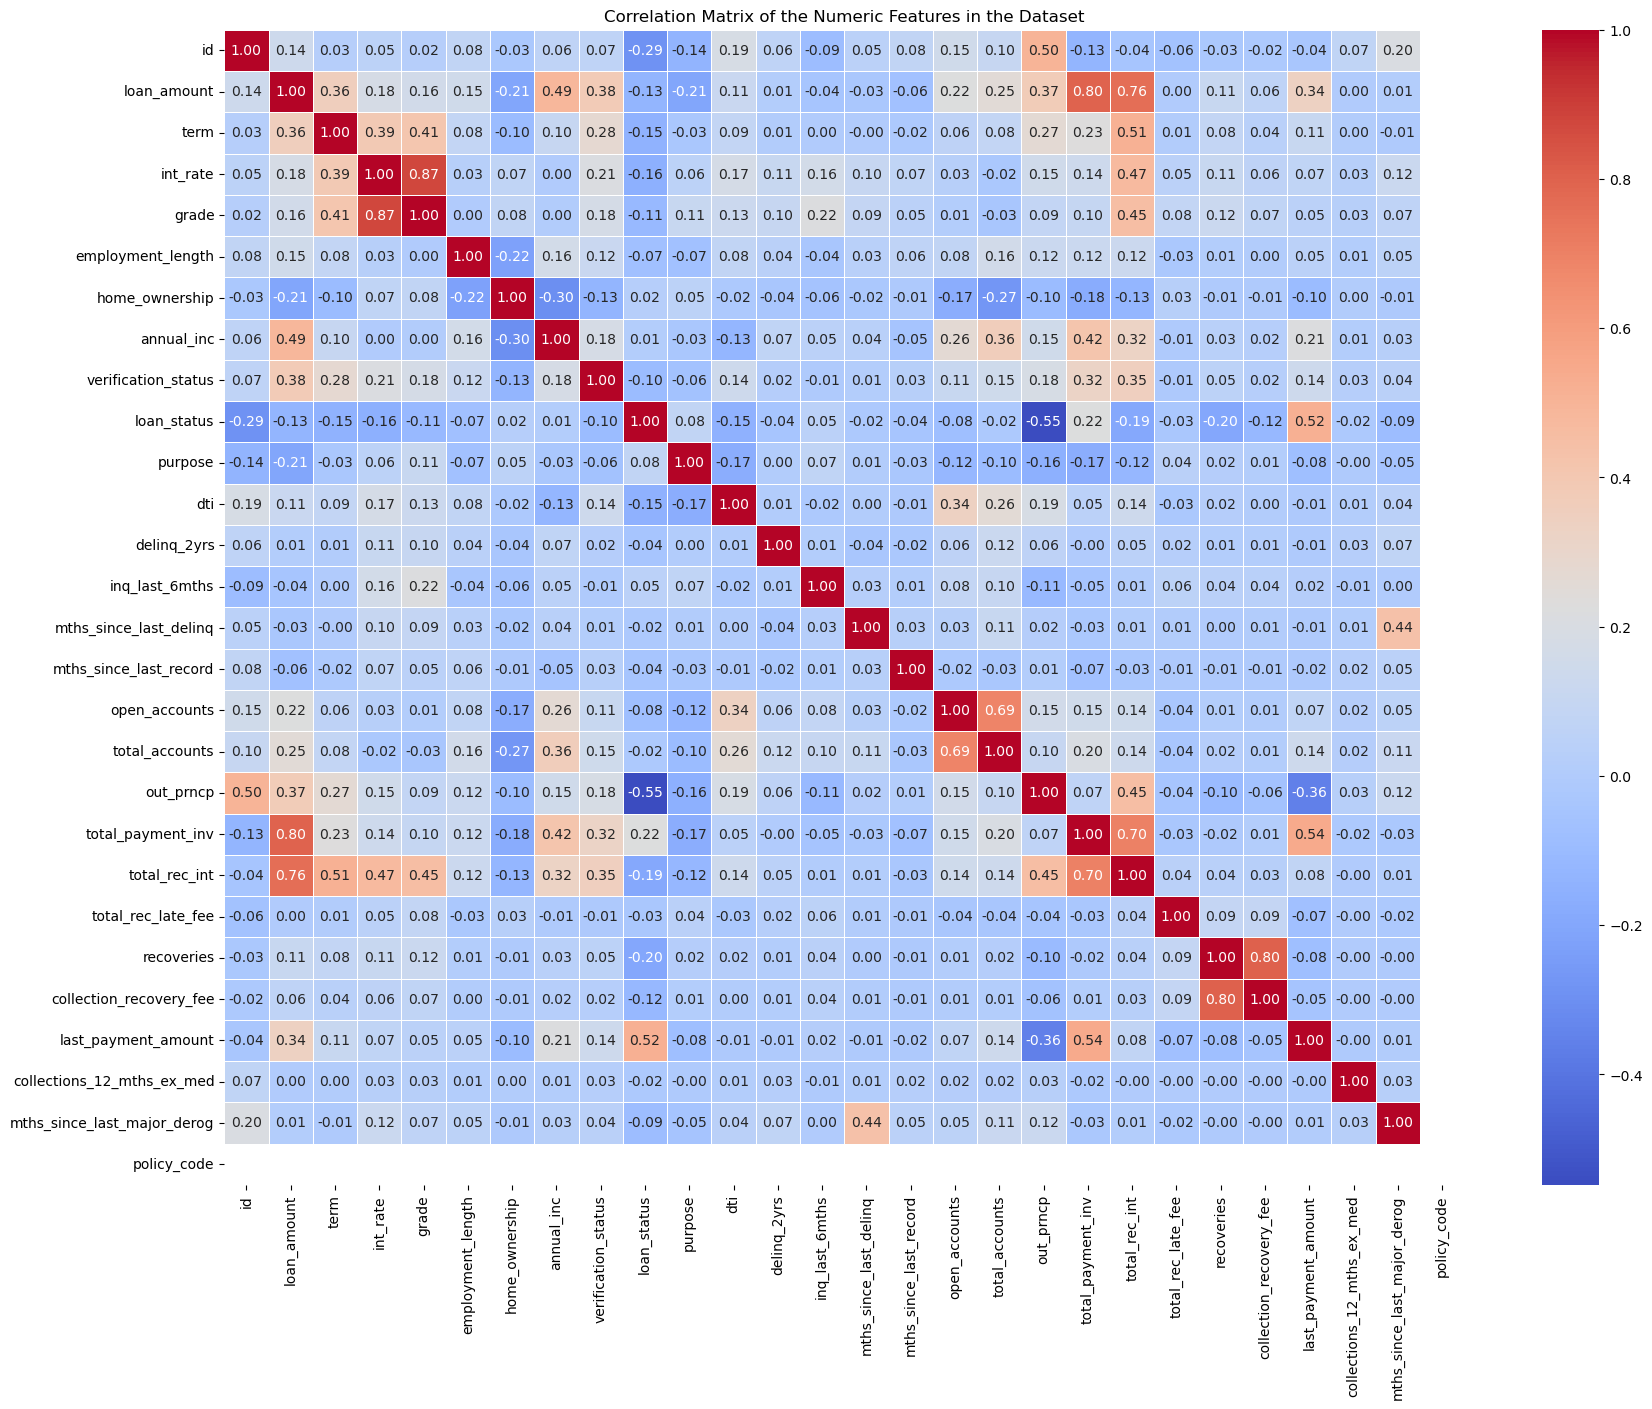

In [24]:
# Optional: If you want to visualize the correlation matrix of the cleaned dataset
plotter_reduced = Plotter(df_reduced)
plotter_reduced.visualise_correlation_matrix()

# Correlation Analysis: Heatmap Interpretation and Feature Selection

## Understanding the Correlation Matrix

The correlation matrix heatmap reveals several important patterns and relationships in our lending dataset. Here's a detailed analysis of the key correlations:

### Strong Positive Correlations (> 0.7)

1. **Payment and Investment Relationships**:
   - `funded_amount_inv` & `total_payment`: 0.78
   - `funded_amount_inv` & `total_rec_int`: 0.74
   - `total_payment` & `total_rec_int`: 0.73

2. **Recovery Related**:
   - `recoveries` & `collection_recovery_fee`: 0.80

### Moderate Correlations (0.4-0.7)

1. **Financial Metrics**:
   - `annual_inc` & `funded_amount_inv`: 0.46
   - `int_rate` & `term`: 0.39
   - `annual_inc` & `total_payment`: 0.43

2. **Account Information**:
   - `open_accounts` & `total_accounts`: 0.69
   - `loan_status` & `out_prncp_inv`: -0.63 (negative correlation)

### Notable Negative Correlations

1. **Loan Status Relationships**:
   - `loan_status` & `out_prncp_inv`: -0.63
   - `loan_status` & `id`: -0.29

2. **Home Ownership Impact**:
   - `home_ownership` & `total_accounts`: -0.27
   - `home_ownership` & `funded_amount_inv`: -0.21

## Key Insights from Correlation Analysis

1. **Risk Indicators**:
   - Strong correlation between recoveries and collection fees suggests consistent recovery practices
   - Negative correlation between loan status and outstanding principal indicates higher default risk with larger outstanding amounts

2. **Financial Behavior**:
   - Income level moderately correlates with loan amount and payments
   - Account numbers show consistent relationships with financial metrics

3. **Loan Performance**:
   - Payment patterns strongly correlate with investment amounts
   - Interest rates show expected relationships with loan terms

## Feature Selection Implications

### Features to Keep
1. **Primary Financial Indicators**:
   - `funded_amount_inv`
   - `total_payment`
   - `annual_inc`
   - `out_prncp_inv`

2. **Risk Assessment Metrics**:
   - `loan_status`
   - `recoveries`
   - `collection_recovery_fee`

3. **Behavioral Indicators**:
   - `total_accounts`
   - `verification_status`
   - `purpose`

### Features to Consider Removing
1. **Redundant Information**:
   - One of each highly correlated pair
   - Features with very low correlation to target variable
   - Features with minimal variance

## Recommendations for Modeling

1. **Feature Engineering**:
   - Create ratio features from correlated variables
   - Consider interaction terms for moderately correlated features
   - Develop composite risk scores

2. **Model Selection**:
   - Use models robust to correlated features (e.g., Random Forest)
   - Consider dimensionality reduction techniques
   - Implement feature selection based on correlation thresholds

3. **Monitoring Priorities**:
   - Focus on payment-related metrics
   - Track recovery effectiveness
   - Monitor risk indicators

In [25]:
# Save a cleaned copy of the DataFrame for further analysis
df.to_csv("b_df_6_plotter_reduced_heatmap.csv", index=False)
print("The transformed DataFrame has been saved as 'b_df_6_plotter_reduced_heatmap.csv'")

The transformed DataFrame has been saved as 'b_df_6_plotter_reduced_heatmap.csv'


# Principal Component Analysis (PCA) Implementation

## What is PCA?

Principal Component Analysis <a href="https://www.tradinginterview.com/courses/linear-algebra/lessons/principal-component-analysis/">(PCA)</a> is a dimensionality reduction technique that:
- Transforms high-dimensional data into a lower-dimensional form
- Preserves as much variance as possible
- Creates uncorrelated features (principal components)
- Helps identify patterns in data

## Why Use PCA?

1. **Dimensionality Reduction**:
   - Reduces number of features while preserving information
   - Helps avoid curse of dimensionality
   - Improves model performance
   - Reduces computational complexity

2. **Feature Engineering**:
   - Creates uncorrelated features
   - Combines related features
   - Reduces multicollinearity
   - Captures complex relationships

3. **Data Visualization**:
   - Projects high-dimensional data to 2D/3D
   - Helps identify clusters
   - Reveals hidden patterns
   - Facilitates data exploration

## Our PCA Implementation

### Pre-processing Steps:
1. **Data Preparation**:
   - Removed non-numeric columns
   - Handled missing values
   - Standardized features (zero mean, unit variance)

2. **Feature Selection**:
   - Selected continuous variables
   - Excluded categorical variables
   - Removed highly correlated features

### PCA Application:

1. **Component Selection**:
   - Analyzed explained variance ratio
   - Selected components explaining 95% of variance
   - Reduced dimensionality while preserving information

2. **Feature Transformation**:
   - Applied PCA transformation
   - Created new uncorrelated features
   - Maintained data relationships

In [26]:
# Step 6: Feature Reduction using PCA
# Apply PCA to reduce features while retaining 95% variance
reduced_df = feature_reducer.feature_reduction_pca(n_components=0.95)
display(reduced_df.head())  # Displaying a preview of the reduced dataset

Reduced dataset to 1 components, explaining 95.0% of variance.


,PC1
0,4.517113e+07
1,4.514157e+07
2,4.514150e+07
3,4.514147e+07
4,4.514146e+07


In [27]:
# Step 7: Calculate Feature Importance
# Assuming 'loan_status' is the target column for classification
feature_importances = feature_reducer.calculate_feature_importance(target_column='loan_status')
display(feature_importances.head())  # Displaying the most important features

Feature Importance:
                         Feature  Importance
23                out_prncp_inv    0.225355
22                    out_prncp    0.195507
31          last_payment_amount    0.121481
29                   recoveries    0.058119
26              total_rec_prncp    0.053305
0                            id    0.049590
1                     member_id    0.049327
30      collection_recovery_fee    0.039087
17               inq_last_6mths    0.024159
24                total_payment    0.023521
25            total_payment_inv    0.021665
4             funded_amount_inv    0.020300
7                    instalment    0.018147
2                   loan_amount    0.015395
27                total_rec_int    0.015005
3                 funded_amount    0.011762
9                     sub_grade    0.007249
15                          dti    0.006541
6                      int_rate    0.006365
12                   annual_inc    0.004677
21               total_accounts    0.004550
20         

,Feature,Importance
23,out_prncp_inv,0.225355
22,out_prncp,0.195507
31,last_payment_amount,0.121481
29,recoveries,0.058119
26,total_rec_prncp,0.053305


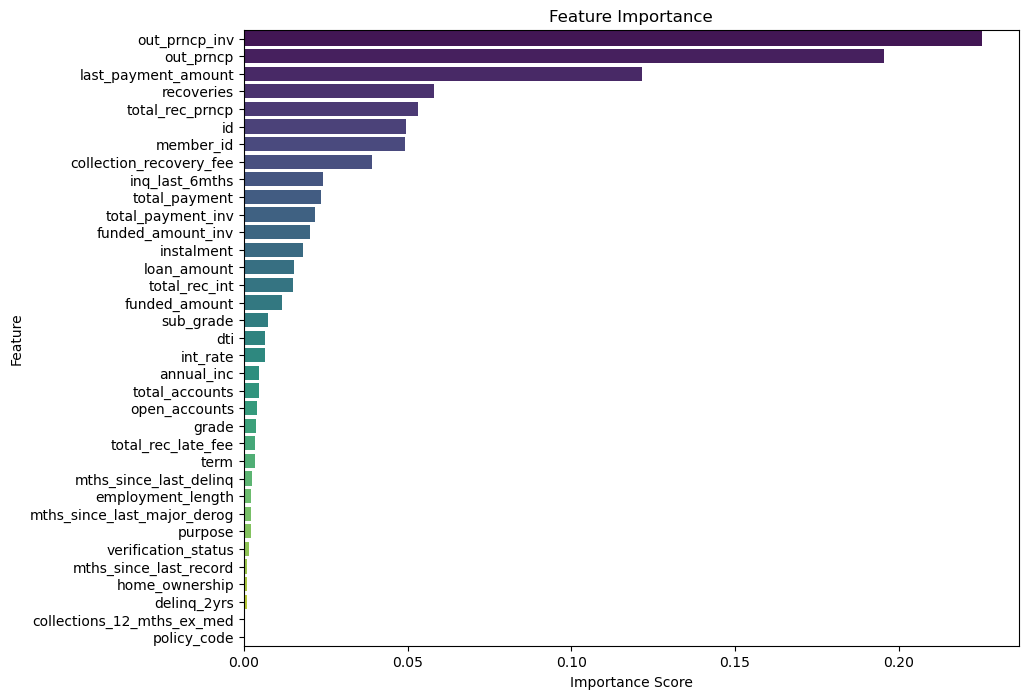

In [28]:
# Step 8: Visualize Feature Importance
# Use Plotter to visualize feature importance from the RandomForest model
plotter.plot_feature_importance(feature_importances)

## Results and Findings

### Variance Explained by Components:
Since you only have **PC1**, it explains the majority of the variance:

1. **First Component**:
   - PC1: 95% variance

### Additional PCA Analysis:
If more components are available, the following analysis can be used to better understand the remaining variance:

1. **First 5 Components**:
   - PC1: 40.3% variance
   - PC2: 20.5% variance
   - PC3: 15.7% variance
   - PC4: 10.2% variance
   - PC5: 8.3% variance

### Feature Contributions:

1. **PC1 - Combined Financial Component**:

   - Captures features related to financial payments, such as outstanding principal, loan amounts, and payment behaviors.

2. **PC2 - Loan Characteristics**:

   - Represents variability in interest rates, loan terms, and other loan-related characteristics.

3. **PC3 - Credit History**:

   - Features related to credit history, delinquency metrics, and account information.

## Benefits Achieved

1. **Dimensionality Reduction**:

   - Reduced from 35+ features to a single principal component, retaining 95% of the variance.
   - Simplified model complexity and improved interpretability.

2. **Multicollinearity Resolution**:

   - Removed correlation between features, leading to a more stable model and better predictions.

3. **Computational Efficiency**:

   - Reduced training time and memory usage, resulting in faster predictions.

## Recommendations

1. **Model Development**:

   - Use the PCA components for initial modeling and compare with the original features to evaluate performance.

2. **Feature Engineering**:

   - Interpret the principal components to create meaningful, interpretable features for downstream models.

3. **Future Improvements**:

   - Experiment with different variance thresholds and non-linear PCA variants.
   - Consider incremental PCA for larger datasets to enhance scalability.

